# Bank Marking Conversion Prediction

BitTiger DS501

# Dataset Description

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt


# Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
# Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

# Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Data Info
5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

# Attribute information:

   For more information, read [Moro et al., 2011].

## Input variables:

### bank client data:
  - 1 - age (numeric)
  - 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - 4 - education (categorical: "unknown","secondary","primary","tertiary")
  - 5 - default: has credit in default? (binary: "yes","no")
  - 6 - balance: average yearly balance, in euros (numeric) 
  - 7 - housing: has housing loan? (binary: "yes","no")
  - 8 - loan: has personal loan? (binary: "yes","no")
  
### related with the last contact of the current campaign:
  - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - 10 - day: last contact day of the month (numeric)
  - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 12 - duration: last contact duration, in seconds (numeric)
  
### other attributes:
  - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##  Output variable (desired target):
  - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")



## Load data and browse data

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('bank/bank-full.csv',sep=';')

In [3]:
# Browse dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Show summary stats
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
cat_features = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','poutcome']
df = pd.get_dummies(df, columns=cat_features)

In [7]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [8]:
df['y'] = (df['y']=='yes').astype(int)

## Build Logistic Regression Model

### Define Features and Target

In [9]:
selected_features = list(df.columns.values)
target = 'y'
selected_features.remove(target)

In [10]:
X = df[selected_features].values
y = df[target].values

In [11]:
X.shape

(45211, 51)

In [12]:
y

array([0, 0, 0, ..., 1, 0, 0])

#### Let's Train-test split the data!

In [13]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model using sklearn

In [14]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [15]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [16]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.909649  0.895790
Accuracy   0.902898  0.899149
Precision  0.659375  0.626891
Recall     0.349503  0.350894
f1-score   0.456851  0.449940


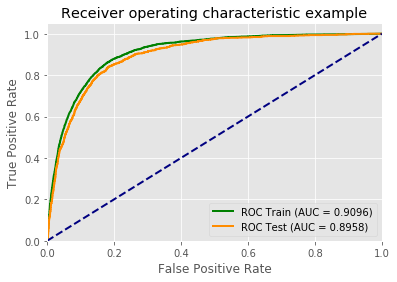

In [18]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Understanding the Estimated Coefficients

In [19]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
49,poutcome_success,1.516899
42,month_mar,1.489794
45,month_oct,0.857492
46,month_sep,0.820123
41,month_jun,0.417795
32,contact_cellular,0.415157
12,job_retired,0.391712
15,job_student,0.386096
37,month_dec,0.383125
33,contact_telephone,0.209175


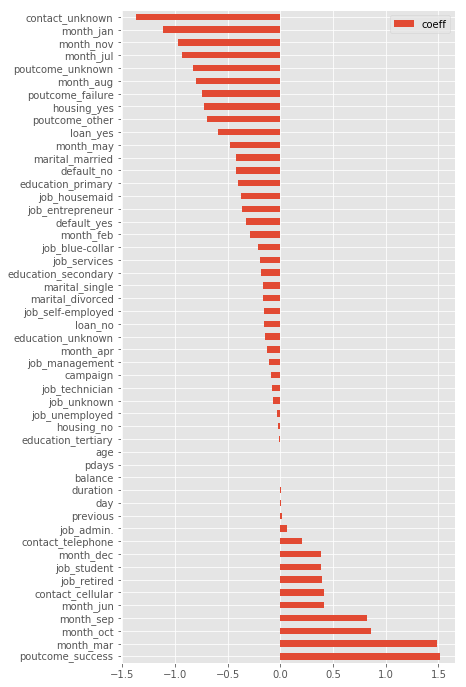

In [20]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.gcf().set_size_inches(6, 12)
plt.show()

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.965803  0.857989
Accuracy   0.933809  0.886321
Precision  0.767993  0.519126
Recall     0.621155  0.446849
f1-score   0.686813  0.480283


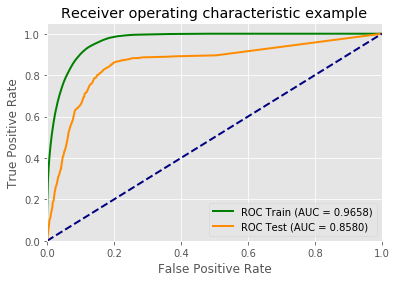

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [22]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.971582  0.925390
Accuracy   0.941468  0.902687
Precision  0.826977  0.610374
Recall     0.631093  0.476011
f1-score   0.715877  0.534884


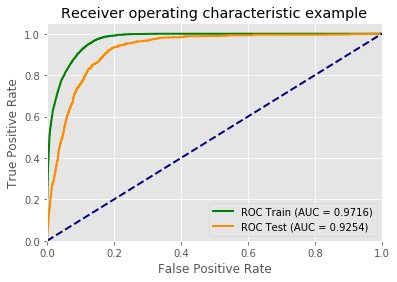

In [23]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Single KNN

              train      test
metrics                      
AUC        0.956968  0.728772
Accuracy   0.924159  0.871945
Precision  0.760267  0.435021
Recall     0.512541  0.299153
f1-score   0.612297  0.354515


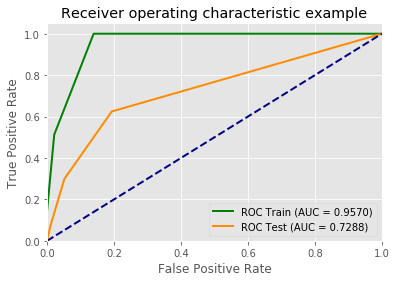

In [24]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.976483  0.775933
Accuracy   0.930242  0.875484
Precision  0.820716  0.452055
Recall     0.515618  0.279398
f1-score   0.633338  0.345349


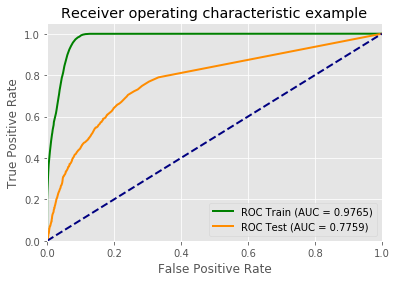

In [25]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.947475  0.920596
Accuracy   0.908510  0.898264
Precision  0.808754  0.686684
Recall     0.284193  0.247413
f1-score   0.420592  0.363762


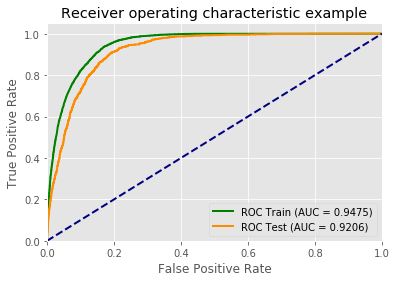

In [26]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.954265  0.927629
Accuracy   0.929938  0.902577
Precision  0.770633  0.611794
Recall     0.570043  0.468485
f1-score   0.655332  0.530634


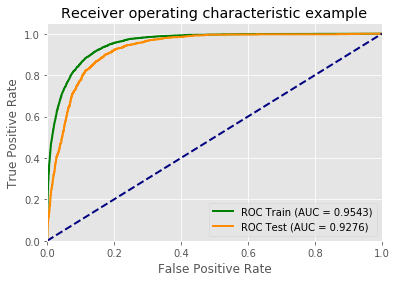

In [27]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.913040  0.901399
Accuracy   0.899663  0.888643
Precision  0.593544  0.533573
Recall     0.448178  0.418627
f1-score   0.510719  0.469162


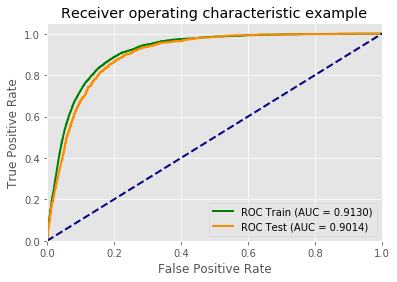

In [28]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-6, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(10,10,10), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.686910  0.677034
Accuracy   0.898142  0.891961
Precision  0.592365  0.556878
Recall     0.411264  0.396049
f1-score   0.485475  0.462892


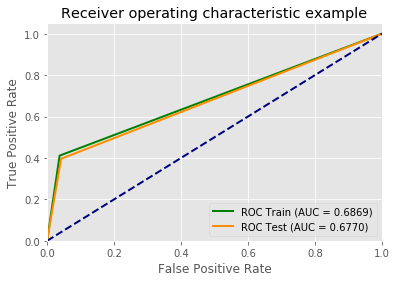

In [29]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

              train      test
metrics                      
AUC        0.893310  0.654586
Accuracy   0.933228  0.882229
Precision  1.000000  0.000000
Recall     0.428538  0.000000
f1-score   0.599967  0.000000


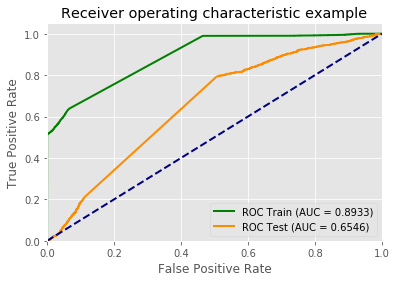

In [30]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.995770  0.928809
Accuracy   0.971439  0.901581
Precision  0.985111  0.634109
Recall     0.767156  0.384760
f1-score   0.862578  0.478923


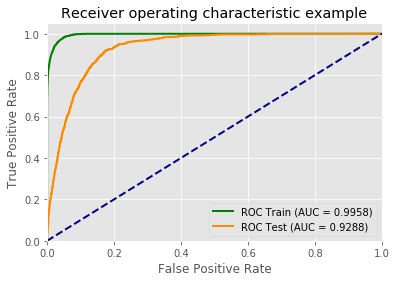

In [32]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)